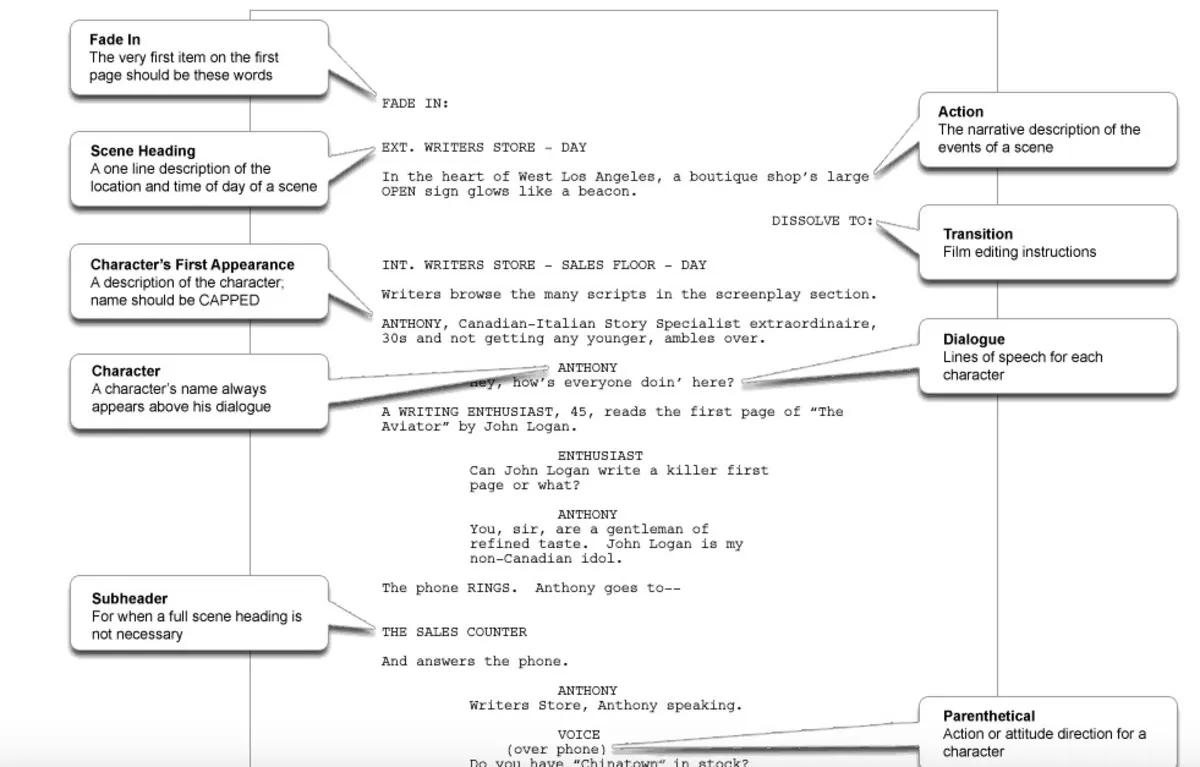

In [ ]:
import pandas as pd
import spacy
nlp = spacy.load('en_core_web_sm')
import contractions
import unicodedata
import re
from collections import Counter

## Import Data

In [ ]:
df = pd.read_csv('./dataset/Christopher Nolan Filmography and Scripts.csv', encoding='ISO-8859-1')

In [ ]:
df['Wiki Plot'][3]

In [ ]:
with open('./dataset/Scripts/2010 Inception Script.txt', 'r') as f:
    inception_script = f.read()

In [197]:
# Extract character names and dialogues

with open('test.txt', 'r') as f:
    inception_script = f.read()

In [ ]:
lines[120].startswith(' '*20)

In [190]:
i = 0
for line in lines[:50]:
    print(f'{i}: {line}')
    i+=1

0: INCEPTION
1: 
2:        
3: 
4:                         Written by
5: 
6:                      Christopher Nolan
7: 
8: 
9: 
10: 
11:                                             SHOOTING SCRIPT
12:   FADE IN:
13: 
14:   DAWN. CRASHING SURF.
15: 
16:   The waves TOSS a BEARDED MAN onto wet sand. He lies there.
17: 
18:   A CHILD'S SHOUT makes him LIFT his head to see: a LITTLE
19:   BLONDE BOY crouching, back towards us, watching the tide eat
20:   a SANDCASTLE. A LITTLE BLONDE GIRL joins the boy. The Bearded
21:   Man tries to call them, but they RUN OFF, FACES UNSEEN. He
22:   COLLAPSES.
23: 
24:   The barrel of a rifle ROLLS the Bearded Man onto his back. A
25:   JAPANESE SECURITY GUARD looks down at him, then calls up the
26:   beach to a colleague leaning against a JEEP. Behind them is a
27:   cliff, and on top of that, a JAPANESE CASTLE.
28: 
29:   INT. ELEGANT DINING ROOM, JAPANESE CASTLE - LATER
30: 
31:   The Security Guard waits as an ATTENDANT speaks to an ELDERLY
32:   JA

In [198]:
lines = inception_script.split('\n')
current = {}
previous = {}
character_dialogues = []
for line in lines[0:100]:
    print(line)
#     line = line.strip()
    if line.isupper() and line.startswith(' ' * 20) and line[-1]!=':' and not ('SHOOTING SCRIPT' in line):
#         print(line)
        # The line contains a character name
        print('here')
        previous = current
        current = {}
        character_dialogues.append(previous)
        character = line.strip()
        current[character] = ''
    elif character != '':
        print(line)
        if line and line.startswith(' '*10) and line[-1] != ':':
            # The line contains dialogue for the current character
            if len(current[character]) > 0:
                # Append the dialogue to the existing dialogue for the character
                current[character] += '\n' + line
            else:
                # Start a new dialogue for the character
                current[character] = line
            

# Print the character names and dialogues
for i in character_dialogues:
    print(i)

INCEPTION
INCEPTION


       
       


                        Written by
                        Written by


KeyError: 'FLIGHT ATTENDANT (O.S.)'

In [ ]:
test = {'name': 'string'}
get

In [ ]:
for i in df['character']:
    print(i)

## Text cleaning and preprocessing

In [ ]:
def process_text(script):
    clean_script = {}
    # Remove special characters using regular expression
    clean_text = re.sub(r'[^\w\s]', '', str(script))

    # Remove accent characters using the unicodedata module
    no_accent_text = ''.join(char for char in unicodedata.normalize('NFD', clean_text) 
                            if unicodedata.category(char) != 'Mn')

    # Expand contractions using contractions library
    expanded_text = contractions.fix(no_accent_text)

    doc = nlp(expanded_text)

    # Tokenization
    tokens = [token.text for token in doc]

    # Stopword removal
    filtered_tokens = [token for token in doc if not token.is_stop]

    # Lemmatization
    lemmas = [token.lemma_ for token in filtered_tokens if not token.is_stop]

    # Add part-of-speech (POS) tagging
    adjectives = []
    nouns = []
    verbs = []
    for token in filtered_tokens:
        if token.pos_ == "ADJ":
            adjectives.append(token.lemma_)
        if token.pos_ == "NOUN" or token.pos_ == "PROPN":
            nouns.append(token.lemma_)
        if token.pos_ == "VERB":
            verbs.append(token.lemma_)
    clean_script["lemma"] = " ".join(lemmas)
    clean_script["nouns"] = " ".join(nouns)
    clean_script["adjectives"] = " ".join(adjectives)
    clean_script["verbs"] = " ".join(verbs)
    clean_script["nav"] = " ".join(nouns+adjectives+verbs)
    clean_script["no_tokens"] = len(lemmas)

    # Add named entity recognition
    person = []
    org = []
    gpe = [] # geopolitical entity
    date = []
    time = []
    money = []
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            person.append(ent.text)
        if ent.label_ == "ORG":
            org.append(ent.text)
        if ent.label_ == "DATE":
            date.append(ent.text)
        if ent.label_ == "TIME":
            time.append(ent.text)
        if ent.label_ == "MONEY":
            money.append(ent.text)
        if ent.label_ == "GPE":
            gpe.append(ent.text)
    clean_script["person"] = "|".join(person)
    clean_script["org"] = "|".join(org)
    clean_script["date"] = "|".join(date)
    clean_script["time"] = "|".join(time)
    clean_script["money"] = "|".join(money)
    clean_script["gpe"] = "|".join(gpe)

    return clean_script

In [ ]:
clean_inception = process_text(inception_script)

In [ ]:
pattern = r'\b[A-Z]+\b'
filtered = re.sub(pattern, '', clean_inception['lemma'])

In [ ]:
counter = Counter(filtered.split())
counter.most_common(50)